# M249 Computer Activity 12.6: Lung cancer in Finland

## Setting the stage
Data on lung cancer incidences in each of 47 regions surrounding an asbestos mine
in Finland.  
We would like to get a posterior distribution of lambda in a Poisson model = what is the model for the expected number of incidences over a certain time period.

## Bayesian model
The following Bayesian model for the data was proposed:  
Prior: $\log \lambda \sim \mathcal{N}(\log 5, 0.4212)$   
Likelihood: $X \sim Poisson(\lambda)$  
This consists of a Poisson model for X, the number of lung cancer cases in a
region, and a normal model for log λ, where λ is the Poisson mean. The prior for
log λ reflects an expert’s opinions.  
We are using log λ instead of λ directly to use a prior that allows both negative as positive values.

## Using python library PYMC3 instead of WinBUGS
Below is the code for using pymc3 to sample the posterior distributions of the
parameters. It shows how to:
* set up the model 
* incorporate observed data 
* visualize traceplots and posterior distributions
* get a numerical summary of the posteriors
* get quantiles for calculating equal-tailed 95% confidence intervals

In [1]:
# import pymc3 and some necessary math functions
import pymc3 as pm
from pymc3.math import log, exp

In [2]:
# data that was observed
observed_data = np.array([
    10,  1,  0, 2, 4, 2, 2, 7, 19, 10,
    11, 12, 10, 5, 2, 1, 2, 3,  2,  3,
     2,  3,  2, 1, 2, 1, 2, 1,  3,  0,
     6,  4,  3, 1, 0, 1, 0, 2,  2,  1,
     1,  0,  1, 0, 1, 1, 4
])

In [3]:
# define the model and start sampling:
with pm.Model() as model:
    
    # Prior log_lambda and lambda
    log_lambda = pm.Normal('log_lambda', mu=log(5.), sd=0.421)  # stochastic node
    # because lambda is a function of log_lambda, this is a deterministic node
    lambda_ = pm.Deterministic('lambda_', exp(log_lambda))  # deterministic node  
    
    # Likelihood with observed data
    # use observed=observed_data to add data
    X = pm.Poisson('theta', mu=lambda_, observed=observed_data)
    
    # Draw samples
    # Tune is for the number of samples to skip to get into equilibrium
    # So tune should be the burn-in period
    # Draws is the number of samples drawn after tuning
    # Chains is the number of simulations run
    trace = pm.sample(tune=10000, draws=1000, chains=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [log_lambda]
Sampling 3 chains: 100%|██████████| 33000/33000 [00:19<00:00, 1734.36draws/s]


In [4]:
# show a representation of the log_lambda prior
log_lambda

log_lambda

In [5]:
lambda_

lambda_

In [6]:
X

theta

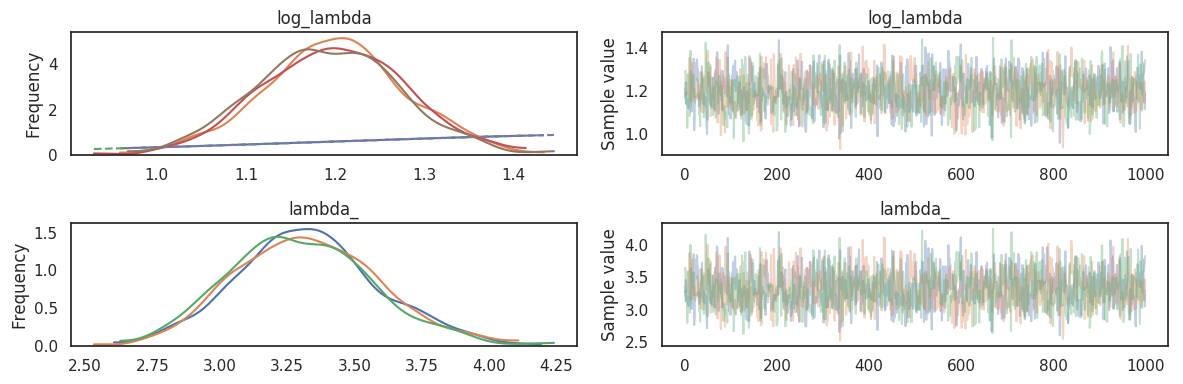

In [7]:
# trace plot to check for practical convergence and 
# see the posterior distribution for each chain of each parameter
pm.traceplot(
    trace, 
    varnames=['log_lambda', 'lambda_'], 
    priors=[log_lambda.distribution, None],  # add this if you'd like to show the priors
);

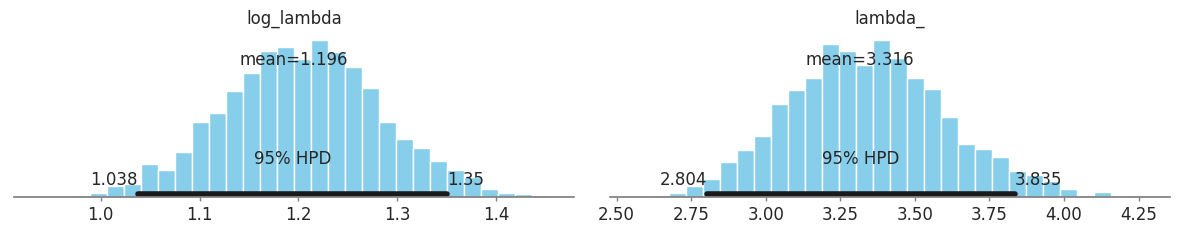

In [8]:
# show Highest Posterior Density
pm.plot_posterior(trace);

In [9]:
# simple summary of the posterior distributions
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
log_lambda,1.196,0.079,0.002,1.038,1.350,1372.854,1.001
lambda_,3.316,0.264,0.007,2.804,3.835,1395.273,1.001


In [10]:
# get equal tailed 95% confidence intervals
pm.quantiles(trace['lambda_'], qlist=(2.5, 25, 50, 75, 97.5))

{2.5: 2.8306263831769396,
 25: 3.1326931044140403,
 50: 3.3064026059404763,
 75: 3.4858012394038407,
 97.5: 3.8769951878774083}